In [69]:
import statsmodels.api as sm

In [70]:
import numpy as np

In [71]:
T = 100
n = 5

In [72]:
colvec = ['TSUS', 'd1', 'd2']

mean = [0, 0]

cov = [[1, 0], [0, 2]]  # diagonal covariance

x, y = np.random.multivariate_normal(mean, cov, 5000).T

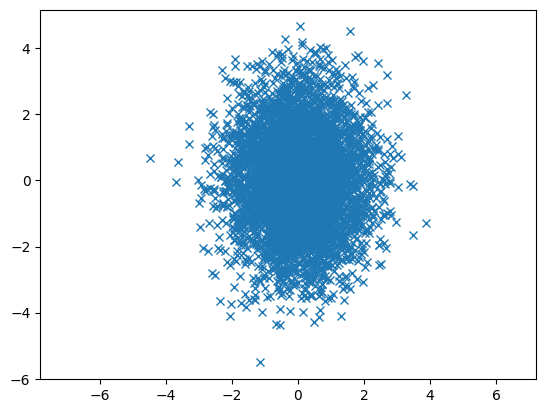

In [73]:
plt.plot(x, y, 'x')

plt.axis('equal')

plt.show()

In [74]:
df = pd.DataFrame(dict(a=np.random.normal(a_bar, a_sd, size=T),
                       b=np.random.normal(b_bar, b_sd, size=T),
                       c=np.random.normal(b_bar, b_sd, size=T)),
                  columns=colvec)

In [75]:
df

,TSUS,d1,d2


In [76]:
def LSTM_processor(list_of_series, shocktime_vec, shocklength_vec):

SyntaxError: incomplete input (3687437864.py, line 1)

In [77]:
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

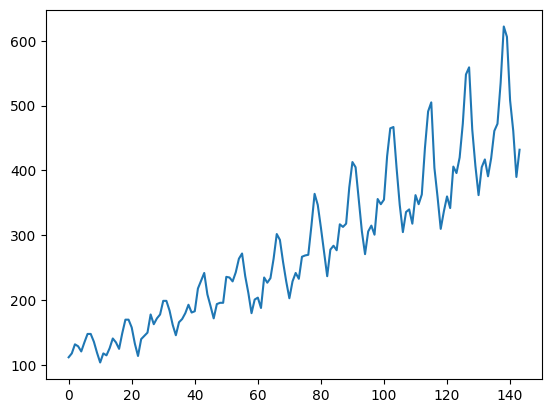

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [145]:
dataset.iloc[115]

Passengers    505
Name: 115, dtype: int64

In [146]:
dataset.iloc[115] = dataset.iloc[115] - .76 * dataset.iloc[115]

/var/folders/v7/mnntvsmn377350vt28qbg1r40000gn/T/ipykernel_66230/2864360854.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.19999999999999' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.iloc[115] = dataset.iloc[115] - .76 * dataset.iloc[115]


In [147]:
# Now let's inject a shock into this series

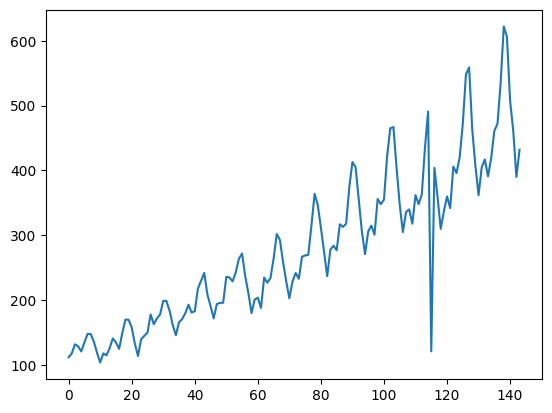

In [148]:
plt.plot(dataset)
plt.show()

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [150]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [151]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataframe = dataset
dataset = dataset.astype('float32')

In [152]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [153]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [154]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [155]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [156]:
trainX.shape[0]

94

In [157]:
testX.shape[0]

46

In [158]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [159]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 0s - 4ms/step - loss: 0.0304
Epoch 2/100
94/94 - 0s - 257us/step - loss: 0.0140
Epoch 3/100
94/94 - 0s - 261us/step - loss: 0.0112
Epoch 4/100
94/94 - 0s - 269us/step - loss: 0.0102
Epoch 5/100
94/94 - 0s - 265us/step - loss: 0.0093
Epoch 6/100
94/94 - 0s - 259us/step - loss: 0.0084
Epoch 7/100
94/94 - 0s - 264us/step - loss: 0.0075
Epoch 8/100
94/94 - 0s - 257us/step - loss: 0.0067
Epoch 9/100
94/94 - 0s - 265us/step - loss: 0.0059
Epoch 10/100
94/94 - 0s - 262us/step - loss: 0.0052
Epoch 11/100
94/94 - 0s - 262us/step - loss: 0.0045
Epoch 12/100
94/94 - 0s - 265us/step - loss: 0.0039
Epoch 13/100
94/94 - 0s - 271us/step - loss: 0.0034
Epoch 14/100
94/94 - 0s - 263us/step - loss: 0.0031
Epoch 15/100
94/94 - 0s - 257us/step - loss: 0.0028
Epoch 16/100
94/94 - 0s - 256us/step - loss: 0.0025
Epoch 17/100
94/94 - 0s - 255us/step - loss: 0.0024
Epoch 18/100
94/94 - 0s - 252us/step - loss: 0.0022
Epoch 19/100
94/94 - 0s - 259us/step - loss: 0.0022
Epoch 20/100
94/94 - 0s - 276us/ste

In [160]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


In [161]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [162]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.78 RMSE
Test Score: 80.80 RMSE


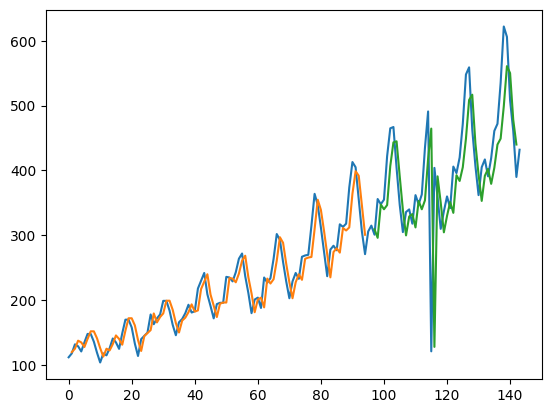

In [163]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [178]:
scaler.inverse_transform(dataset)[115]

array([121.2], dtype=float32)

In [179]:
testPredictPlot[115]

array([464.56985], dtype=float32)

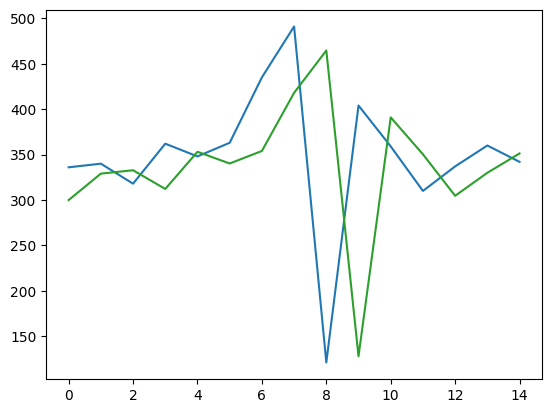

In [184]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[107:122])
plt.plot(trainPredictPlot[107:122])
plt.plot(testPredictPlot[107:122])
plt.show()